# X-MR Control Chart

Individuals and Moving Range Charts $x-mr$ have to be tested against normality first.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import anderson
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#plt.style.available

In [3]:
x_bar=0.5
sigma=0.001
np.random.seed(42)
y = np.random.normal(loc = x_bar, scale = sigma, size=50)

In [4]:
print(y)

[0.50049671 0.49986174 0.50064769 0.50152303 0.49976585 0.49976586
 0.50157921 0.50076743 0.49953053 0.50054256 0.49953658 0.49953427
 0.50024196 0.49808672 0.49827508 0.49943771 0.49898717 0.50031425
 0.49909198 0.4985877  0.50146565 0.49977422 0.50006753 0.49857525
 0.49945562 0.50011092 0.49884901 0.5003757  0.49939936 0.49970831
 0.49939829 0.50185228 0.4999865  0.49894229 0.50082254 0.49877916
 0.50020886 0.49804033 0.49867181 0.50019686 0.50073847 0.50017137
 0.49988435 0.4996989  0.49852148 0.49928016 0.49953936 0.50105712
 0.50034362 0.49823696]


Build a histogram and compute basic statistics: $\bar{x}$ and $\hat{\sigma}$

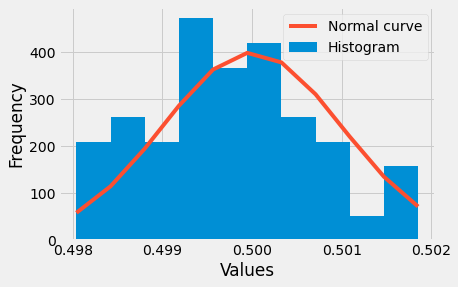

In [5]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(y, density=True, label="Histogram")
yn = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - x_bar))**2))
ax.plot(bins, yn, label="Normal curve")
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.legend()

### Anderson-Darling normality test

In [6]:
AD, cv, sl=anderson(y)
if AD > cv[2]:
  print("Reject Ho: Data is not normal")
elif AD <= cv[2]:
  print("Cannot reject Ho: Data is normal")
print("Significance level is: ",sl[2], "%")

Cannot reject Ho: Data is normal
Significance level is:  5.0 %


### Probability plot

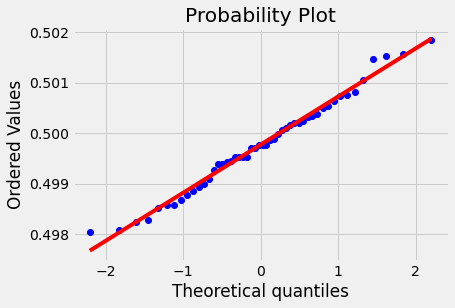

In [7]:
from scipy.stats import probplot
probplot(y,dist="norm", plot=plt)
plt.show()

/home/ernesto/anaconda3/envs/tf/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


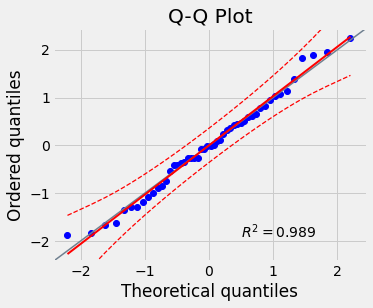

In [8]:
import pingouin as pg
ax = pg.qqplot(y, dist='norm')

## Calculating control limits

In [9]:
xbar=statistics.mean(y)

In [10]:
mr=np.abs(np.diff(y))

In [11]:
mrbar=statistics.mean(mr)

In [12]:
#np.savetxt('y.csv', y, delimiter=',')

In [13]:
#np.savetxt('mr.csv', mr, delimiter=',')

In [14]:
UCLx=xbar+3*mrbar/1.128
LCLx=xbar-3*mrbar/1.128
UCLmr=mrbar*3.267

In [15]:
print("xbar= " + repr(xbar))
print("UCLx= " + repr(UCLx))
print("LCLx= " + repr(LCLx))
print("mrbar= " + repr(mrbar))
print("UCLmr= " + repr(UCLmr))

xbar= 0.4997745260947439
UCLx= 0.5026558361485306
LCLx= 0.4968932160409571
mrbar= 0.001083372580223821
UCLmr= 0.003539378219591223


In [16]:
# Horizontal values
meas=np.linspace(1, y.shape[0], y.shape[0])
print(meas)
measmr=np.linspace(1, mr.shape[0], mr.shape[0])
print(measmr)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


In [17]:
uclx=np.full((y.shape[0], 1), UCLx)
lclx=np.full((y.shape[0], 1), LCLx)
Xbar=np.full((y.shape[0], 1), xbar)
#print(uclx)

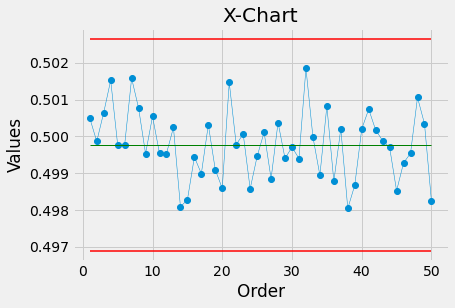

In [32]:
plt.figure(0)
#plt.subplot(211)
plt.plot(meas, y, marker= 'o',linewidth=0.5)
plt.plot(meas,uclx, 'r-',linewidth=1.5)
plt.plot(meas,lclx, 'r-', linewidth=1.5)
plt.plot(meas,Xbar, 'g-', linewidth=1.0)
plt.xlabel('Order')
plt.ylabel("Values")
plt.title("X-Chart")
plt.show()

In [19]:
MRbar=np.full((mr.shape[0], 1), mrbar)
uclmr=np.full((mr.shape[0], 1), UCLmr)

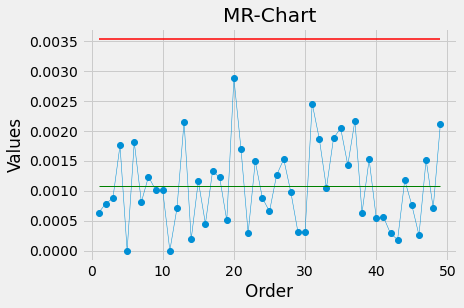

In [34]:
plt.figure(1)
#plt.subplot(211)
plt.plot(measmr, mr, marker= 'o',linewidth=0.5)
plt.plot(measmr,uclmr, 'r-', linewidth=1.5)
plt.plot(measmr,MRbar, 'g-', linewidth=1.0)
plt.xlabel('Order')
plt.ylabel("Values")
plt.title("MR-Chart")
plt.show()